In [1]:
#Pricer une Option avec la formule de Black&Scholes

In [2]:
import yfinance as yf
import datetime as dt
import numpy as np
from scipy.stats import norm
from scipy.optimize import brentq
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display


In [3]:
#Stock
start= "2024-05-01"
end= dt.datetime.now()
stock = yf.download("GOLD", start, end)
stock_adj = stock["Close"]

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


In [4]:
#Paramètres
S0= stock_adj.iloc[-1] #Prix à T0
K = S0    #Strike
T = 1      # Time until maturity
type = "Call"
r = 2.75 #yf.download("^TNX", start, end)["Adj Close"].iloc[-1]
q = 0 # yf.Ticker("AAPL").info.get("dividendYield")
sigma = 0.15
S0

Ticker
GOLD    18.27
Name: 2025-02-24 00:00:00, dtype: float64

In [5]:
#Find the implied volatility ?

In [19]:
#Formule de Black&Scholes
#Aller dans Options Yahoo Finance ou sur internet
def black_scholes(S, K, T, r, q, sigma, type):
    d1 = (np.log(S/K) + (r/100 - q + (sigma**2)/2))*T/(sigma*np.sqrt(T))
    d2 = d1 - sigma*np.sqrt(T)
    if type == "Call":
        return S*np.exp(-q*T)*norm.cdf(d1)-K*np.exp(-r*T/100)*norm.cdf(d2)
    if type == "Put":
        return K*np.exp(-r*T/100)*norm.cdf(-d2)-S*np.exp(-q*T)*norm.cdf(-d1)       
black_scholes(S0,K,T,r,q,sigma,type).item()

1.343274406190842

In [73]:
# Création de la figure
output = widgets.Output()

# Fonction de mise à jour
def update(K, T, r, q, sigma, option_type):
    S_values = np.linspace(1, 50, 100)  # Prix du sous-jacent
    prices = [black_scholes(S, K, T, r, q, sigma, option_type) for S in S_values]

    with output:
        clear_output(wait=True)  # Efface l'affichage précédent
        fig, ax = plt.subplots(figsize=(6, 4))
        ax.plot(S_values, prices, label=f"Prix de l'option {option_type.capitalize()}", color="b")
        ax.axvline(K, color="red", linestyle="--", label=f"Strike K={K}")
        ax.set_xlabel("Prix du sous-jacent (S)")
        ax.set_ylabel("Prix de l'option")
        ax.legend()
        ax.grid(True)
        plt.show()

# Widgets interactifs
K_slider = widgets.FloatSlider(min=5, max=50, step=1, value=S0.item(), description="Strike K")
T_slider = widgets.FloatSlider(min=0.1, max=2.0, step=0.1, value=1.0, description="Maturité T")
r_slider = widgets.FloatSlider(min=0.0, max=0.1, step=0.01, value=0.05, description="Taux r")
q_slider = widgets.FloatSlider(min=0.0, max=0.1, step=0.01, value=0.02, description="Dividende q")
sigma_slider = widgets.FloatSlider(min=0.1, max=1.0, step=0.05, value=0.2, description="Volatilité σ")
option_type_selector = widgets.ToggleButtons(options=["Call", "Put"], description="Type d'option")

# Création de l'interaction
interactive_plot = widgets.interactive(update, 
                                       K=K_slider, 
                                       T=T_slider, 
                                       r=r_slider, 
                                       q=q_slider, 
                                       sigma=sigma_slider, 
                                       option_type=option_type_selector)

# Affichage
display(K_slider, T_slider, r_slider, q_slider, sigma_slider, option_type_selector, output)

# Premier affichage du graphe
update(K_slider.value, T_slider.value, r_slider.value, q_slider.value, sigma_slider.value, option_type_selector.value)



FloatSlider(value=18.270000457763672, description='Strike K', max=50.0, min=5.0, step=1.0)

FloatSlider(value=1.0, description='Maturité T', max=2.0, min=0.1)

FloatSlider(value=0.05, description='Taux r', max=0.1, step=0.01)

FloatSlider(value=0.02, description='Dividende q', max=0.1, step=0.01)

FloatSlider(value=0.2, description='Volatilité σ', max=1.0, min=0.1, step=0.05)

ToggleButtons(description="Type d'option", options=('Call', 'Put'), value='Call')

Output()

In [72]:
output = widgets.Output()


def update(K, T, r, q, sigma, option_type):
    S_values = np.linspace(1, 50, 100)
    C = black_scholes(S0, K, T, r, q, sigma, option_type)

    if option_type == "Call":
        PNL = [ (i - K - C if i > K else -C) for i in S_values]
    if option_type == "Put":
        PNL = [ (K -i - C if i < K else -C) for i in S_values]


    with output:
        clear_output(wait=True)  # Efface l'affichage précédent
        fig, ax = plt.subplots(figsize=(6, 4))
        ax.plot(S_values, PNL, label=f"P/L option {option_type.capitalize()}", color="b")
        ax.axvline(K, color="red", linestyle="--", label=f"Strike K={K}")
        ax.set_xlabel("Prix du sous-jacent (S)")
        ax.set_ylabel("P/L")
        ax.legend()
        ax.grid(True)
        if option_type == "Call":
                plt.plot(S_values,S_values - S0.item())
        if option_type == "Put":
                plt.plot(S_values,-S_values + S0.item())

        plt.show()


# Widgets interactifs
K_slider = widgets.FloatSlider(min=1, max=50, step = 0.01, value=S0.item(), description="Strike K")
T_slider = widgets.FloatSlider(min=0.1, max=2.0, step=0.1, value=1.0, description="Maturité T")
r_slider = widgets.FloatSlider(min=0.0, max=0.1, step=0.01, value=0.05, description="Taux r")
q_slider = widgets.FloatSlider(min=0.0, max=0.1, step=0.01, value=0.02, description="Dividende q")
sigma_slider = widgets.FloatSlider(min=0.1, max=1.0, step=0.05, value=0.2, description="Volatilité σ")
option_type_selector = widgets.ToggleButtons(options=["Call", "Put"], description="Type d'option")

# Création de l'interaction
interactive_plot = widgets.interactive(update, 
                                       K=K_slider, 
                                       T=T_slider, 
                                       r=r_slider, 
                                       q=q_slider, 
                                       sigma=sigma_slider, 
                                       option_type=option_type_selector)

# Affichage
display(K_slider, T_slider, r_slider, q_slider, sigma_slider, option_type_selector, output)

# Premier affichage du graphe
update(K_slider.value, T_slider.value, r_slider.value, q_slider.value, sigma_slider.value, option_type_selector.value)



FloatSlider(value=18.270000457763672, description='Strike K', max=50.0, min=1.0, step=0.01)

FloatSlider(value=1.0, description='Maturité T', max=2.0, min=0.1)

FloatSlider(value=0.05, description='Taux r', max=0.1, step=0.01)

FloatSlider(value=0.02, description='Dividende q', max=0.1, step=0.01)

FloatSlider(value=0.2, description='Volatilité σ', max=1.0, min=0.1, step=0.05)

ToggleButtons(description="Type d'option", options=('Call', 'Put'), value='Call')

Output()

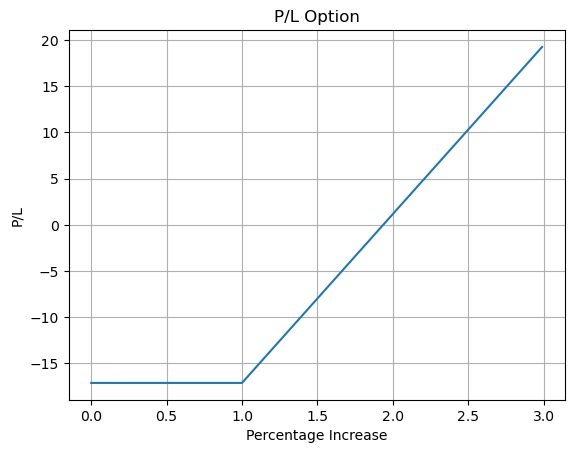

In [34]:
#Tracé Value portfolio Call
C = black_scholes(S0,K,T,r,q,sigma,type)
A = np.arange(0,3,0.01)
G = [ (i*K - K - C if i > 1 else -C) for i in A]
plt.title('P/L Option')
plt.plot(A,G)
plt.xlabel('Percentage Increase')
plt.ylabel('P/L')
plt.grid(True)
plt.show()

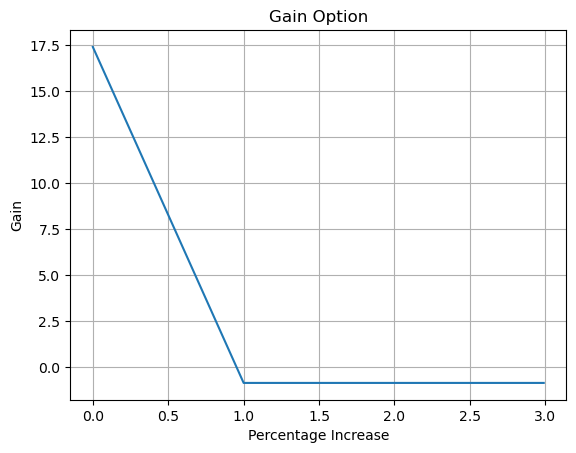

In [9]:
#Tracé Value portfolio Put
C = black_scholes(S0,K,T,r,q,sigma,"Put")
A = np.arange(0,3,0.01) #S/K
G = [ (K -i*K - C if i < 1 else -C) for i in A]
plt.title('Gain Option')
plt.plot(A,G)
plt.xlabel('Percentage Increase')
plt.ylabel('Gain')
plt.grid(True)
plt.show()